# **Introducción a Python**
# FP29. Capstone 2
## Máquina Enigma
¡Bienvenido Agente! Nos encontramos en pleno conflicto y hemos encontrado los planos de una  [Máquina Enigma](https://es.wikipedia.org/wiki/Enigma_(máquina)) enemiga. Necesitamos que configures una máquina que nos ayude a descifrar los mensajes que interceptamos.
La máquina posee tres rotores y un reflector. Cada rotor es un disco circular plano con 26 contactos eléctricos en cada cara, uno por cada letra del alfabeto. Cada contacto de una cara está conectado o cableado a un contacto diferente de la cara contraria. Por ejemplo, en un rotor en particular, el contacto número 1 de una cara puede estar conectado con el contacto número 14 en la otra cara y el contacto número 5 de una cara con el número 22 de la otra.

Como cada rotor está en contacto con el otro, lo anterior permite ir cambiando el indice de las letras de entrada, configurando así una criptografía muy compleja de resolver en aquellos tiempos. Estos rotores se conocen como.

* Rotor derecho
* Rotor medio
* Rotor izquierdo
* Reflector

Mira este video para que entiendas mejor el concepto le la [Máquina Enigma](https://youtu.be/VnsTHAH5yAE).

## Estructura de los rotores

Los tres rotores (izquierdo, medio y derecho) tienen el alfabeto de 26 letras ordenadas en su sección de entrada y las mismas 26 letras desordenadas en su sección de salida.<br>
El reflector, posee solo 13 letra, las cuales están repetidas 2 veces cada una y están repartidas aleatoriamente en el dispositivo. El punto en donde la señal del rotor izquierdo pasa al reflector, determina la letra de entrada; la salida será por la letra que conforma la pareja.

Esta es la configuración que hemos encontrado:

```python
"""
Reflector  Rot_izd   Rot_med   Rot_der  Teclado
    A       A - E     A - A     A - B      A
    B       B - K     B - J     B - D      B
    C       C - M     C - D     C - F      C
    D       D - F     D - K     D - H      D
    E       E - L     E - S     E - J      E
    F       F - G     F - I     F - L      F
    G       G - D     G - R     G - C      G
    D       H - Q     H - U     H - P      H
    I       I - V     I - X     I - R      I
    J       J - Z     J - B     J - T      J
    K       K - N     K - L     K - X      K
    G       L - T     L - H     L - V      L
    M       M - O     M - W     M - Z      M
    K       N - W     N - T     N - N      N
    M       O - Y     O - M     O - Y      O
    I       P - H     P - C     P - E      P
    E       Q - X     Q - Q     Q - I      Q
    B       R - U     R - G     R - W      R
    F       S - S     S - Z     S - G      S
    T       T - P     T - N     T - A      T
    C       U - A     U - P     U - K      U
    V       V - I     V - Y     V - M      V
    V       W - B     W - F     W - U      W
    J       X - R     X - V     X - S      X
    A       Y - C     Y - O     Y - Q      Y
    T       Z - J     Z - E     Z - O      Z
"""
```

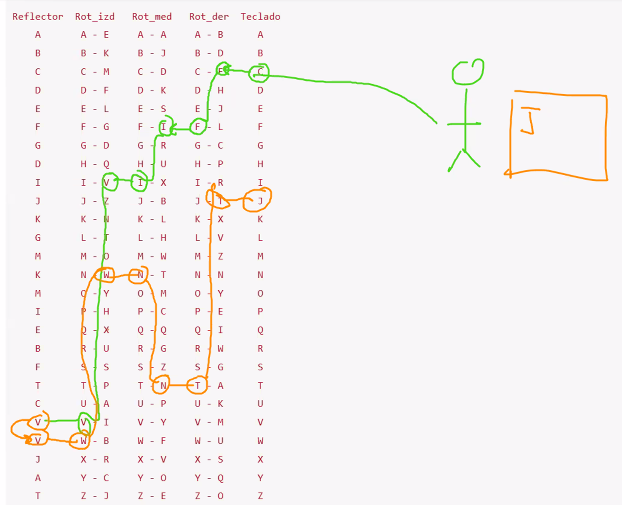

## Funcionamiento general
Cada vez que un usuario presiona una tecla en el Teclado (columna derecha del diagrama anterior), ocurre lo siguiente:
1. El Rotor_derecho avanza una posición hacia arriba, i.e., la combinación 'A - B' pasa al final de la lista y el primer lugar lo ocupa 'B - D'
2. Se obtiene la posición en la lista (Teclado) de la tecla presionada por el operador .
3. La posición obtenida en el punto 2, se utiliza para buscar la letra en la sección derecha del Rotor_derecho que está en la misma posición (frente a frente). En esa posición existe una letra a la cual llamaremos Letra_entrada.
4. En el Rotor_derecho se busca la posición de la Letra_entrada en la sección de salida. Esta será la posición de salida del rotor.
5. Se repiten los pasos anteriores, 3 y 4, en el Rotor_medio; esta vez la posición de entrada es equivalente a la posición de salida del punto 4.
6. Se repiten los pasos anteriores, 3 y 4, en el Rotor_izquierdo.
7. Con la posición de salida del Rotor_izquierdo se entra en el Reflector. En la posición de entrada en el Reflector hay una letra. Se buscará entonces la otra letra equivalente dentro del Reflector. Esto determinará la posición de salida.
8. Con esta posición (la de salida del Reflector) se invierte el proceso, es decir, se busca la letra que está en contacto con el rotor anterior y se busca la posición de dicha letra en la salida del rotor. Este proceso se repite sucesivamente con los rotores izquierdo, medio y derecho.
9. La posición de salida del Rotor_derecho marcará la posición en el Teclado, indicando la letra encriptada.

## Algunos detalles adicionales
Cada vez que procesamos una letra, primero rotamos una posición el Rotor_derecho (hacia arriba).
Cuando la letra "V" de la componente ordenada (izquierda) del Rotor_derecho alcanza la posición inicial en la lista, en el siguiente movimiento, arrastrará al Rotor_medio, haciéndolo girar una posición. Esto se debe a que la máquina es un dispositivo electro-mecánco.
Lo mismo ocurre cuando la letra "Q" de la componente ordenada (izquierda) del Rotor_medio llega al inicio, en este caso, el el siguiente movimiento, hará  avanzar una posición hacia arriba al Rotor_izquierdo.

## Más detalles
Esto no termina aquí. Para hacer más difícil el trabajo de desencriptación, la máquina tiene la posibilidad de fijar la posición inicial de los tres rotores centrales (izquierdo, medio y derecho). Para esto se elige una clave de tres letras, las cuales marcan la posición inicial de la primera letra de la sección ordenada (izquierda) de cada rotor. Por ejemplo la clave <font color='red'>'MCK'</font> dejaría los rotores de la siguiente forma:

```Python
"""
Reflector  Rot_izd   Rot_med   Rot_der  Teclado
    A       M - O     C - D     K - X      A
    B       N - W     D - K     L - V      B
    C       O - Y     E - S     M - Z      C
    D       P - H     F - I     N - N      D
    E       Q - X     G - R     O - Y      E
    F       R - U     H - U     P - E      F
    G       S - S     I - X     Q - I      G
    D       T - P     J - B     R - W      H
    I       U - A     K - L     S - G      I
    J       V - I     L - H     T - A      J
    K       W - B     M - W     U - K      K
    G       X - R     N - T     V - M      L
    M       Y - C     O - M     W - U      M
    K       Z - J     P - C     X - S      N
    M       A - E     Q - Q     Y - Q      O
    I       B - K     R - G     Z - O      P
    E       C - M     S - Z     A - B      Q
    B       D - F     T - N     B - D      R
    F       E - L     U - P     C - F      S
    T       F - G     V - Y     D - H      T
    C       G - D     W - F     E - J      U
    V       H - Q     X - V     F - L      V
    V       I - V     Y - O     G - C      W
    J       J - Z     Z - E     H - P      X
    A       K - N     A - A     I - R      Y
    T       L - T     B - J     J - T      Z
"""
```
Fíjate que ni el Teclado ni el Reflector cambian, solo los rotores izquierdo, medio y derecho.

Aquí te dejamos algunos videos con la misma explicación:
    
[Criptografía - Máquina Enigma, funcionamiento detallado](https://youtu.be/XK_1gUo8YDE)


## <font color='green'>Misión</font>

Con los planos obtenidos, debes programar en Python tu propia Máquina Enigma. Cuando hayas terminado, se te dará un mensaje cifrado que deberás decodificar para aprobar el curso.

Tu misión consiste en lo siguiente:<br>
1. Programar la lógica de la máquina utilizando la información de los rotores conseguidos
2. Ingresar una clave inicial (te será dada)
3. Decodificar el mensaje correctamente

Tips:

1. Con la clave <font color='red'>'MCK'</font>, la frase **"ENIGMA REVEALED"** debiera encriptarse como **'QMJIDOMZWZJFJR"** y viceversa.
2. Recuerda usa stackoverflow e internet para buscar sintaxis y funciones.
3. Divide el desafío en tantos problemas pequeños como puedas. A continuación te proponemos una serie de actividades en las cuales se resuelve el desafío; pero si quieres resolverlo de otra forma puedes hacerlo sin problemas.

## <font color='green'>Actividad 1:</font> Cablea los rotores

Crea los cableados de los rotores

TIP:
1. Crea lista con las secuencias
2. Utiliza los strings proporcionados y conviértelos a listas con `split()`


In [1]:
# Componente ordenada de los rotores
st = 'A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'

# Convierte el string 'st' en una lista
st_l = st.split(' ')

In [2]:
# Creamos el reflector
rf = 'A B C D E F G D I J K G M K M I E B F T C V V J A T'

# Convierte el string 'rf' en una lista
rf_l = rf.split(' ')

In [3]:
# Creamos el rotor derecho
# Este string contiene el alfabeto de salida (desordenado)
str_r_derecha = 'B D F H J L C P R T X V Z N Y E I W G A K M U S Q O'

# Convierte el string 'rf' en una lista
str_r_derecha_l = str_r_derecha.split(' ')

In [4]:
# Creamos el rotor medio
# Este string contiene el alfabeto de salida (desordenado)
str_r_medio = 'A J D K S I R U X B L H W T M C Q G Z N P Y F V O E'

# Convierte el string 'rf' en una lista
str_r_medio_l = str_r_medio.split(' ')

In [5]:
# Creamos el rotor iquierdo
# Este string contiene el alfabeto de salida (desordenado)
str_r_izq = 'E K M F L G D Q V Z N T O W Y H X U S P A I B R C J '

# Convierte el string 'rf' en una lista
str_r_izq_l = str_r_izq.split(' ')

## <font color='green'>Actividad 2:</font> Arma los rotores

Crea tres listas vacias para almacenar los rotores armados.
Recuerda que cada rotor tiene una componente ordenada y otra desordenada. La ordenada va la izquierda y desordenada a la derecha.

TIP:
1. La estructura a obtener debiera ser una lista de listas. Por ejemplo, el rotor_izquierdo debería verse así:

```python
[['A', 'E'],
 ['B', 'K'],
 ['C', 'M'],
 ['D', 'F'],
 ['E', 'L'],
 ['F', 'G'],
 ['G', 'D'],
 ['H', 'Q'],
 ['I', 'V'],
 ['J', 'Z'],
 ['K', 'N'],
 ['L', 'T'],
 ['M', 'O'],
 ['N', 'W'],
 ['O', 'Y'],
 ['P', 'H'],
 ['Q', 'X'],
 ['R', 'U'],
 ['S', 'S'],
 ['T', 'P'],
 ['U', 'A'],
 ['V', 'I'],
 ['W', 'B'],
 ['X', 'R'],
 ['Y', 'C'],
 ['Z', 'J']]
```

In [6]:
# Crea tres listas vacias para almacenar los rotores armados
# Recuerda que cada rotor tendrá una componente ordenada y otra desordenada

rotor_der = []
rotor_medio = []
rotor_izq = []

Ya creadas las listas, ahora añádeles los pares de letras que conforman cada uno de los tres rotores.

TIP:
1. Utiliza un ciclo `for` para añadir los pares de elementos  (ordenado - desordenado) en cada rotor.
2. Utiliza las listas que creamos anteriormente
3. Utiliza la función `zip()` para unir las lista
4. Utiliza la función `append()` e *indexing*

```python
for i in zip(lista_1, lista_2):
    disco.append([i[0], i[1]])
```

In [7]:
# Tu código aquí ...
for i in zip(st_l, str_r_derecha_l):
    rotor_der.append([i[0], i[1]])

for i in zip(st_l, str_r_medio_l):
    rotor_medio.append([i[0], i[1]])

for i in zip(st_l, str_r_izq_l):
    rotor_izq.append([i[0], i[1]])

Como alternativa también pudimos usar zip() y map()


```
lista1 = [1, 2, 3]
lista2 = [4, 5, 6]
# Usar zip() y map() para crear una lista de listas
lista_de_listas = list(map(list, zip(lista1, lista2)))
```



Imprime la configuración del Reflector, de los tres rotores y del Teclado. De la misma forma que en la instrucciones iniciales.

Tip:
1. Utiliza función `print( )` y `f-strings` para el correcto formateo
2. Utiliza `zip()` nuevamente para agrupar todas las listas. Luego recórrelas con un ciclo `for` para imprimirlas.

In [8]:
def imprimir_maquina():
    for i in zip(rf_l, rotor_izq, rotor_medio, rotor_der, st_l):
        print(f'{i[0]}       {i[1][0]} - {i[1][1]}     {i[2][0]} - {i[2][1]}     {i[3][0]} - {i[3][1]}      {i[4]}')

imprimir_maquina()


A       A - E     A - A     A - B      A
B       B - K     B - J     B - D      B
C       C - M     C - D     C - F      C
D       D - F     D - K     D - H      D
E       E - L     E - S     E - J      E
F       F - G     F - I     F - L      F
G       G - D     G - R     G - C      G
D       H - Q     H - U     H - P      H
I       I - V     I - X     I - R      I
J       J - Z     J - B     J - T      J
K       K - N     K - L     K - X      K
G       L - T     L - H     L - V      L
M       M - O     M - W     M - Z      M
K       N - W     N - T     N - N      N
M       O - Y     O - M     O - Y      O
I       P - H     P - C     P - E      P
E       Q - X     Q - Q     Q - I      Q
B       R - U     R - G     R - W      R
F       S - S     S - Z     S - G      S
T       T - P     T - N     T - A      T
C       U - A     U - P     U - K      U
V       V - I     V - Y     V - M      V
V       W - B     W - F     W - U      W
J       X - R     X - V     X - S      X
A       Y - C   

## <font color='green'>Actividad 3:</font> Crea una función para girar los rotores

Crea una función llamada **avanza_rotor**. La función debe girar los rotores hacia arriba. Créala de esta forma:

```python
def avanza_rotor(disco, paso):
```
Entrada:<br>
**disco**: corresponde a la lista con la información del rotor a avanzar. Esta es una lista de listas.<br>
**paso**. Esta variable indicará la cantidad de pasos que debe avanzar el rotor.

Salida:<br>
La función debe devolver el rotor (lista de listas) rotado **paso** pasos.

TIP:
1. Recuerda el uso de `pop()` y `append()` en las listas

In [9]:
# La función extraerá el primer término (el de arriba) de la lista y lo agregará al final (abajo) de la lista.
# Hacemos un while para que lo haga la cantidad de pasos que se especifique
def avanza_rotor (disco, paso):
    i = 0
    while i < paso:
        fila_sup = disco.pop(0)
        disco.append(fila_sup)
        i += 1


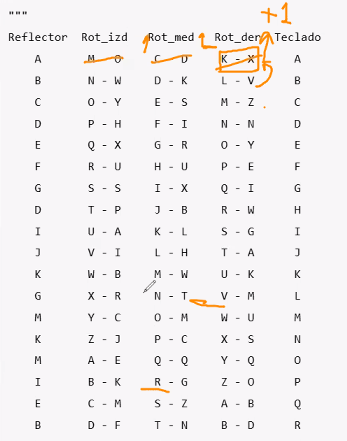

## <font color='green'>Actividad 4:</font> Crea una función para posicionar los rotores según la clave inicial

Crea una función que configure la posición inicial de los rotores. Llámala **conf_rotores** de esta forma:

```python
def conf_rotores(clave_inicial):
```
Entrada:<br>
**clave_inicial**: corresponde a un string de tres letras.<br>

A partir de la clave inicial se rotan los tres rotores (izquierdo, medio y derecho).

Salida:<br>
La función debe devolver los tres rotores posicionados según la clave ingresada.

Tip:
1. Necesitarás usar un ciclo `while` cuya condición de salida sea que la letra izquierda del primer par de letras de cada rotor coincida con la letra correspondiente de la clave ingresada.
2. No es necesario que pases los rotores (lista) como argumentos ya que esta estructura tiene carácter *global* en Python.


In [10]:
#
def conf_rotores(clave_inicial):
    while True:
        avanza_rotor(rotor_izq, 1)
        if rotor_izq[0][0] == clave_inicial[0]:
            break
    while True:
        avanza_rotor(rotor_medio, 1)
        if rotor_medio[0][0] == clave_inicial[1]:
            break
    while True:
        avanza_rotor(rotor_der, 1)
        if rotor_der[0][0] == clave_inicial[2]:
            break


# Quizás también podría buscar el índice de la letra y moverlo suficientes pasos
# para que quede primera

In [11]:
# Pureba con la clave 'MCK'
# Tu código aquí ...
conf_rotores('MCK')

In [12]:
# Imprime la nueva configuración de rotores
# Este código lo deberías haber hecho más arriba
imprimir_maquina()

A       M - O     C - D     K - X      A
B       N - W     D - K     L - V      B
C       O - Y     E - S     M - Z      C
D       P - H     F - I     N - N      D
E       Q - X     G - R     O - Y      E
F       R - U     H - U     P - E      F
G       S - S     I - X     Q - I      G
D       T - P     J - B     R - W      H
I       U - A     K - L     S - G      I
J       V - I     L - H     T - A      J
K       W - B     M - W     U - K      K
G       X - R     N - T     V - M      L
M       Y - C     O - M     W - U      M
K       Z - J     P - C     X - S      N
M       A - E     Q - Q     Y - Q      O
I       B - K     R - G     Z - O      P
E       C - M     S - Z     A - B      Q
B       D - F     T - N     B - D      R
F       E - L     U - P     C - F      S
T       F - G     V - Y     D - H      T
C       G - D     W - F     E - J      U
V       H - Q     X - V     F - L      V
V       I - V     Y - O     G - C      W
J       J - Z     Z - E     H - P      X
A       K - N   

## <font color='green'>Actividad 5:</font> Crea funciones para pasar señales por los rotores

Crea tres funciones llamadas **pasa_senal_ida**, **pasa_senal_vuelta** e **indice_reflextor** de esta forma:

```python
def pasa_senal_ida(rotor, indice):

    
def pasa_senal_vuelta(rotor, indice):
    
    
def indice_reflextor(rotor, indice):
    
```
Entrada:<br>
**rotor**: corresponde a la lista con la información del rotor. Esta es una lista de listas.<br>
**indice**. Es el punto de contacto en el rotor: En el caso de **pasa_senal_ida** será por la derecha y en el caso de **pasa_senal_vuelta** será por la izquierda

Salida:<br>
Las funciones devuelven el indice de salida del rotor. Esto simula por donde salía la corriente del rotor para tomar contacto con el siguiente rotor o el reflector.

In [13]:
# Esta función busca dentro de un rotor el índice de la fila izquierda en donde se
# encuentra la letra que quiero conectar con la letra de la fila derecha (misma letra)
def busca(rotor, indice):
    for i,l in enumerate(rotor):
        if l[0] == rotor[indice][1]:
            return i

In [14]:
# De derecha a izquierda
def pasa_senal_ida(rotor, indice):
    for i,l in enumerate(rotor):
        if l[0] == rotor[indice][1]:
            return i

# De izquierda a derecha
def pasa_senal_vuelta(rotor, indice):
    for i,l in enumerate(rotor):
        if l[1] == rotor[indice][0]:
            return i

# Se busca dentro del reflector la otra letra igual. rotor sería rf_l
def indice_reflextor(rotor, indice):
    for i,s in enumerate(rotor):
        # Descarta buscar en el mismo índice inicial, ya que debe buscar la duplicada
        if i != indice and s == rotor[indice]:
            return i

# Hago una función extra que busca el índice de una letra en teclado.
# Esta función recibe una letra.
def indice_teclado(letra):
    for i,s in enumerate(st_l):
        if s == letra:
            return i

## <font color='green'>Actividad 5:</font> Armando la ENIGMA

Bien hecho hasta acá Hacker. Ahora debes armar la máquina.

Crea una función **enigma** e integra todo lo anterios en ella.

```python
def enigma(mensaje, clave):
```
Entrada:<br>
**mensaje**: corresponde a un string que contiene el mensaje a codificar. Recuerda que no se usaban ni números ni caracteres especiales. Solo lo que el teclado de entrada pudiera escribir.<br>
**clave**. Es la clave para posicionar los rotores al inicio.

Salida:<br>
Mensaje cifrado


In [15]:
# Cada vez que procesamos una letra, primero rotamos el disco
# derecho (sus dos componentes); a partir de ahí se desarrolla el flujo
# de conexiones.
#
# Cuando la letra "V" del rotor derecho alcance la posición inicial
# (posición 0 de la lista), en la siguiente iteración, arrastrará
# mecánicamente una posición al rotor del medio, haciéndolo moverse una
# posición. Recordemos que la máquina era electro-mecánica.
#
# Lo mismo ocurre cuando la letra "Q" del rotor central llega al inicio.
# La siguiente vez que avance, arrastrará mecánicamente una posición
# al rotor izquierdo.


def enigma(mensaje, clave):
    # Primero ordeno las listas según clave
    conf_rotores(clave)

    # Defino string vacío para agregar letra por letra
    m_cifrado = ''
    # Proceso cada letra del mensaje con un for.
    for letra in mensaje:
        # 1. El Rotor_derecho avanza una posición hacia arriba
        avanza_rotor (rotor_der, 1)
        # El Rotor medio se mueve hacia arriba si es que el rotor derecho pasa
        # de [V - M] a [W - U], por ello, si es que la posición [0][0] del rotor
        # der es igual a  W entonces movemos el de al medio. Si no, seguimos.
        if rotor_der[0][0] == 'W':
            avanza_rotor (rotor_medio, 1)
        # Mismo caso para el rotor izq si es que el de al medio pasa de Q a R.
        if rotor_medio[0][0] == 'R':
            avanza_rotor (rotor_izq, 1)
        # 2. Se obtiene la posición en la lista (Teclado) de la tecla presionada por el operador .
        i_tec_ida = indice_teclado(letra)
        # 3. La posición obtenida en el punto 2 será la misma que la de la letra
        # en la sección derecha del Rotor_derecho (frente a frente).
        # 4. En el Rotor_derecho se busca la posición de la Letra_entrada en la sección de salida.
        i_RD_ida = pasa_senal_ida(rotor_der, i_tec_ida)
        # 5. Se repiten los pasos anteriores, 3 y 4, en el Rotor_medio.
        i_RM_ida = pasa_senal_ida(rotor_medio, i_RD_ida)
        # 6. Se repiten los pasos anteriores, 3 y 4, en el Rotor_izquierdo.
        i_RI_ida = pasa_senal_ida(rotor_izq, i_RM_ida)
        # 7. Con la posición de salida del Rotor_izquierdo se entra en el Reflector.
        # Se buscará entonces la otra letra equivalente dentro del Reflector.
        i_rf_vuelta = indice_reflextor (rf_l, i_RI_ida)
        i_RI_vuelta = pasa_senal_vuelta(rotor_izq, i_rf_vuelta)
        i_RM_vuelta = pasa_senal_vuelta(rotor_medio, i_RI_vuelta)
        i_RD_vuelta = pasa_senal_vuelta(rotor_der, i_RM_vuelta)
        #8. La posición de salida del Rotor_derecho marcará la posición en el Teclado, indicando la letra encriptada.
        letra_secreta = st_l[i_RD_vuelta]
        m_cifrado += letra_secreta
    return m_cifrado


In [16]:
# Probemos si funciona

#enigma('QMJIDOMZWZJFJR','MCK', verbose=False)
# Me lanza error con verbose

enigma('QMJIDOMZWZJFJR','MCK')

'ENIGMAREVEALED'

In [17]:
enigma('QUIENNECESITAAYUDACONLATAREADELAMAQUINAENIGMA', 'MCK' )

'EJJPSZYNAIUAWJTALIXSCKVXLYMOLOSNSJJFQCDPIFMNL'

In [18]:
enigma('EJJPSZYNAIUAWJTALIXSCKVXLYMOLOSNSJJFQCDPIFMNL', 'MCK')

'QUIENNECESITAAYUDACONLATAREADELAMAQUINAENIGMA'

In [19]:
enigma('DGAJUWLKZTHJSDMVRJBUMFYRGQMQNSPTSUYXGPBTVVNBH', 'JGC' )

'QUIENNECESITAAYUDACONLATAREADELAMAQUINAENIGMA'